<a href="https://colab.research.google.com/github/MariaAltisheva/DataCon/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание:
Перед вами данные исследования токсичности наноматериалов.
Это краткое описание баз данных с информациями о наноматериалах, их составе, физико-химических характеристиках, условиях проведения исследований нанотоксичности и данные по выживаемости клеток.

##Описание:

material type, nanoparticle - химическая формула

elements - некислородный элемент входящий в состав (причина - большинство материалов оксиды и металлы)

electronegativity - электроотрицательность по Полингу

ionic radius - ионный радиус элемента (исходя из степени окисления; если смесь степеней - среднее значение)

core size - размер кристаллита (составной элемент наночастиц, который в принципе можно назвать элементарной ячейкой наночастиц)

hydro size, diameter - гидродинамический диаметр частиц - диаметр частиц в растворе

surface charge, zeta potential - дзета-потенциал или заряд поверхности

surface area - площадь поверхности материала (измерено сорбцией азота)

cell type, cells - два типа клеточных линий

exposure dose, concentration, dose - финальная концентрация частиц в растворе с клетками

number of atoms - ачевидно

molecular weight - ачивидно

topological polar surface area - дескриптор рассчитываемый из формулы

a,b,c, alpha, beta, gamma - параметры кристаллической решетки

density - плотность материала

viability - выживаемость клеток

type - тип (органика неорганика)

coat - поверхностная модификация

cell line / primary cells - тип клеток (клеточная линия или отобрано непосредственно из организма)

human / animal - ачивидно

animal - панятна

cell morphology - тип ткани

cell age - эмбриональные или зрелые

cell organ / tissue - орган

exposure time, time - время инкубации материала с клетками

test - тип теста для оценки токсичности материалов

test indicator - использованный реагент

biochemical metrics - по чему оценивалась жизнеспособность

interference test - проверка на то что другие реагенты не вмешивались в результаты

colloidal stability - стабильны ли частицы в растворе

positive control - наличие положительного контроля в тесте (тест демонстрирующий нормальный рост клеток)


In [ ]:
# Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Подгружаем два датасета
df1 = pd.read_excel('np_database_1.xlsx')
df2 = pd.read_excel('np_database_2.xlsx')

In [ ]:
# Смотрим размеры датасетов
print('Размер первого набора данных', df1.shape)
print('Размер первого набора данных', df2.shape)

Размер первого набора данных (807, 13)
Размер первого набора данных (1064, 16)


Количество столбцов и строк разное. Перед тем, как объединить эти датасеты, нужно уровнять количество столбцов. Найти зависимости и взаимосвязи данных.


#Начнем с приведения датасетов к аналогичному виду:
- Удалим лишние столбцы
- Заменим часть значений

Выведем списки всех заголовков

In [ ]:
print('список заголовков первого датасета', df1.columns.ravel())
print('список заголовков второго датасета', df2.columns.ravel())

список заголовков первого датасета ['Unnamed: 0' 'Nanoparticle' 'Type: Organic (O)/inorganic (I)' 'coat'
 'Diameter (nm)' 'Concentration μM' 'Zeta potential (mV)' 'Cells'
 'Cell line (L)/primary cells (P)' 'Human(H)/Animal(A) cells'
 'Cell age: embryonic (E), Adult (A)' 'Exposure time (h)'
 '% Cell viability']
список заголовков второго датасета ['Unnamed: 0' 'No' 'Year' 'Material' 'Type' 'Coat' 'Surface_Charge'
 'Diameter (nm)' 'Cell_Type' 'Human_Animal' 'Cell_Age'
 'Cell Line_Primary Cell' 'Time (hr)' 'Concentration (ug/ml)'
 'Cell_Viability (%)' 'DOI']


<ipython-input-322-0f27f8649ae9>:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print('список заголовков первого датасета', df1.columns.ravel())
<ipython-input-322-0f27f8649ae9>:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print('список заголовков второго датасета', df2.columns.ravel())


На данном шаге мы установили, что лишние столбцы это: No, Year, DOI. Они есть в одном датасете, но отсутствуют в другом. Мы приняли решение их удалить.
Во втором датасете мы переименовываем все колонки, делаем также как в первом.

In [ ]:
# удаляем из второго датафрейма столбцы номер, год и DOI, остальные столбцы переименовываем, как в первом датасете
df2.drop(['No', 'Year', 'DOI'], axis=1, inplace=True)
df2.rename(columns={'Material':'Nanoparticle','Type':'Type: Organic (O)/inorganic (I)','Coat':'coat', 'Diameter (nm)': 'Diameter (nm)',
                    'Surface_Charge': 'Zeta potential (mV)', 'Cell_Type': 'Cells', 'Human_Animal': 'Human(H)/Animal(A) cells',
                    'Cell_Age': 'Cell age: embryonic (E), Adult (A)', 'Cell Line_Primary Cell': 'Cell line (L)/primary cells (P)', 'Time (hr)': 'Exposure time (h)',
                    'Concentration (ug/ml)': 'Concentration μM', 'Cell_Viability (%)': '% Cell viability'},inplace=True)
df2.head() # проверяем, получилось ли всё переименовать

,Unnamed: 0,Nanoparticle,Type: Organic (O)/inorganic (I),coat,Zeta potential (mV),Diameter (nm),Cells,Human(H)/Animal(A) cells,"Cell age: embryonic (E), Adult (A)",Cell line (L)/primary cells (P),Exposure time (h),Concentration μM,% Cell viability
0,92,IronOxide,I,Dextran,unknown,18,VERO,A,Adult,L,24,100,102.00
1,93,IronOxide,I,Dextran,unknown,18,VERO,A,Adult,L,24,200,105.08
2,94,IronOxide,I,Dextran,unknown,18,VERO,A,Adult,L,24,300,100.00
3,95,IronOxide,I,Dextran,unknown,18,VERO,A,Adult,L,24,400,100.00
4,96,IronOxide,I,Dextran,unknown,18,VERO,A,Adult,L,24,500,80.00


In [ ]:
# сравним теперь с первым датасетом
df1.head()

,Unnamed: 0,Nanoparticle,Type: Organic (O)/inorganic (I),coat,Diameter (nm),Concentration μM,Zeta potential (mV),Cells,Cell line (L)/primary cells (P),Human(H)/Animal(A) cells,"Cell age: embryonic (E), Adult (A)",Exposure time (h),% Cell viability
0,9,CuO,I,NaN,52.51,0.000035,-39.67,A549,L,H,A,24,74.587160
1,10,CuO,I,NaN,52.51,0.000087,-39.67,A549,L,H,A,24,66.055046
2,11,CuO,I,NaN,52.51,0.000174,-39.67,A549,L,H,A,24,48.165140
3,12,CuO,I,NaN,52.51,0.000035,-39.67,A549,L,H,A,24,84.713870
4,13,CuO,I,NaN,52.51,0.000087,-39.67,A549,L,H,A,24,68.672810


По столбцам датасеты стали иидентичны. Но в первом датасете необдимо пересчитать значение Concentration μM и удалить значения '-' (если их не кретично много)

In [ ]:
len(df2[df2['Concentration μM'] == '-']) # значений 112, принято решение их удалить

112

Также поступаем со значениями в столбце Diameter (nm), где стоят '-'.


In [ ]:
len(df2[df2['Diameter (nm)'] == '-'])

114

Видим, что значение '-' встречается 112 раз из 1064. Заменить не получается, принимаем решение удалить данные строки и привести object к float. Это важно, поскольку дальше нам нужно будет работать с данными и строить графики

In [ ]:
df2 = df2.loc[df2['Concentration μM'] != '-']

In [ ]:
df2 = df2.loc[df2['Diameter (nm)'] != '-']

In [ ]:
df2['Concentration μM'] = pd.to_numeric(df2['Concentration μM']) # переводим object в float
df2['Diameter (nm)'] = pd.to_numeric(df2['Diameter (nm)']) # переводим object в float

Проанализировав датасеты, приходим к решению пересчиать во втором датасете значения Concentration μM

In [ ]:
df2.loc[df2['Nanoparticle'] == 'Au', 'Concentration μM'] = df2['Concentration μM'] / 196.97 * 1000
df2.loc[df2['Nanoparticle'] == 'CuO', 'Concentration μM'] = df2['Concentration μM'] / 79.55 * 1000
df2.loc[df2['Nanoparticle'] == 'IronOxide', 'Concentration μM'] = df2['Concentration μM'] / 159.69 * 1000
df2.loc[df2['Nanoparticle'] == 'Iron oxide', 'Concentration μM'] = df2['Concentration μM'] / 159.69 * 1000


Во втором датасете отличаются данные по колонке Cell age, изменим их.

In [ ]:
# Во втором датасете заменим значения embryonic на E, а знаечния Аdult на А
df2.loc[df2['Cell age: embryonic (E), Adult (A)'] == 'Adult', 'Cell age: embryonic (E), Adult (A)'] = 'A'
df2.loc[df2['Cell age: embryonic (E), Adult (A)'] == 'Embryonic', 'Cell age: embryonic (E), Adult (A)'] = 'E'
df2.loc[df2['Cell age: embryonic (E), Adult (A)'] == 'Fetus', 'Cell age: embryonic (E), Adult (A)'] = 'F'


Заполним пропуски в колонке 'Zeta potential (mV)'


Au − 24.4 ± 0.8 mV

CuO − 28.6 ± 0.9 mV

Iron oxyde −48.7 ± 0.4 mV

In [ ]:
df1.loc[df1['Nanoparticle'] == 'Au', 'Zeta potential (mV)'] = -24.4
df1.loc[df1['Nanoparticle'] == 'CuO', 'Zeta potential (mV)'] = -28.6
df1.loc[df1['Nanoparticle'] == 'Cu2O', 'Zeta potential (mV)'] = 10.4
df1.loc[df1['Nanoparticle'] == 'IronOxide', 'Zeta potential (mV)'] = -48.7
df1.loc[df1['Nanoparticle'] == 'Iron oxide', 'Zeta potential (mV)'] = -48.7

df2.loc[df2['Nanoparticle'] == 'Au', 'Zeta potential (mV)'] = -24.4
df2.loc[df2['Nanoparticle'] == 'CuO', 'Zeta potential (mV)'] = -28.6
df2.loc[df2['Nanoparticle'] == 'Cu2O', 'Zeta potential (mV)'] = 10.4
df2.loc[df2['Nanoparticle'] == 'IronOxide', 'Zeta potential (mV)'] = -48.7
df2.loc[df2['Nanoparticle'] == 'Iron oxide', 'Zeta potential (mV)'] = -48.7

Предварительно объединим данные в одну таблицу

In [ ]:
df3 = pd.concat([df1,df2]) # предварительное объединение данных для анализа

Было замечено, что Iron Oxide зачастую записывался в разном формате. Исправим это.

In [ ]:
df3.loc[df3['Nanoparticle'] == 'Iron oxide', 'Nanoparticle'] = 'IronOxide'

Переименуем все столбцы на более читаемый и удобный вид

In [ ]:
df3.rename(columns={'Nanoparticle':'Material', 'Type: Organic (O)/inorganic (I)': 'Type','coat':'Coat', 'Human(H)/Animal(A) cells': 'body_cells',
                    'Cell age: embryonic (E), Adult (A)': 'Cell_Age', 'Exposure time (h)': 'Time (hr)'},inplace=True)

In [ ]:
df3 # смотрим, какой датасет у нас получился

,Unnamed: 0,Material,Type,Coat,Diameter (nm),Concentration μM,Zeta potential (mV),Cells,Cell line (L)/primary cells (P),body_cells,Cell_Age,Time (hr),% Cell viability
0,9,CuO,I,NaN,52.51,0.000035,-28.6,A549,L,H,A,24,74.587160
1,10,CuO,I,NaN,52.51,0.000087,-28.6,A549,L,H,A,24,66.055046
2,11,CuO,I,NaN,52.51,0.000174,-28.6,A549,L,H,A,24,48.165140
3,12,CuO,I,NaN,52.51,0.000035,-28.6,A549,L,H,A,24,84.713870
4,13,CuO,I,NaN,52.51,0.000087,-28.6,A549,L,H,A,24,68.672810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,3811,Au,I,Citrate,4.70,507.691527,-24.4,RAW264.7,L,A,A,48,68.957000
1060,3816,Au,I,Citrate,270.00,25.384576,-24.4,RAW264.7,L,A,A,48,93.893000
1061,3817,Au,I,Citrate,270.00,50.769153,-24.4,RAW264.7,L,A,A,48,86.005000
1062,3818,Au,I,Citrate,270.00,507.691527,-24.4,RAW264.7,L,A,A,48,79.644000


Проверяем, где у нас остались пустые значения

In [ ]:
df3.isnull().sum() # проверяем, где у нас есть пустые значения

Unnamed: 0                           0
Material                             0
Type                                 0
Coat                               237
Diameter (nm)                        0
Concentration μM                     0
Zeta potential (mV)                  0
Cells                                0
Cell line (L)/primary cells (P)      0
body_cells                           0
Cell_Age                             0
Time (hr)                            0
% Cell viability                     0
dtype: int64

In [ ]:
!pip install openpyxl # установка библиотеки для выгрузки данных

In [ ]:
df3.describe() # проведем описательный анализ численных значений

,Unnamed: 0,Diameter (nm),Concentration μM,Time (hr),% Cell viability
count,1670.000000,1670.000000,1.670000e+03,1670.000000,1670.000000
mean,1502.222156,97.001078,2.182463e+02,37.697006,81.446294
std,993.687522,162.582483,7.777123e+02,30.674255,33.354834
min,9.000000,1.500000,3.681525e-31,1.000000,-58.897640
25%,631.250000,13.500000,3.817935e-05,24.000000,71.562000
50%,1438.500000,30.000000,5.076915e+00,24.000000,91.134000
75%,1978.750000,108.000000,1.257071e+02,48.000000,98.655642
max,3819.000000,957.000000,1.500000e+04,336.000000,404.811700


Построим матрицу корелляции Пирсона. Чтобы понять, какие значения кореллируют между собой

<ipython-input-340-442d1619d390>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df3.corr()


Text(0.5, 1.0, 'Матрица корелляции Пирсона')

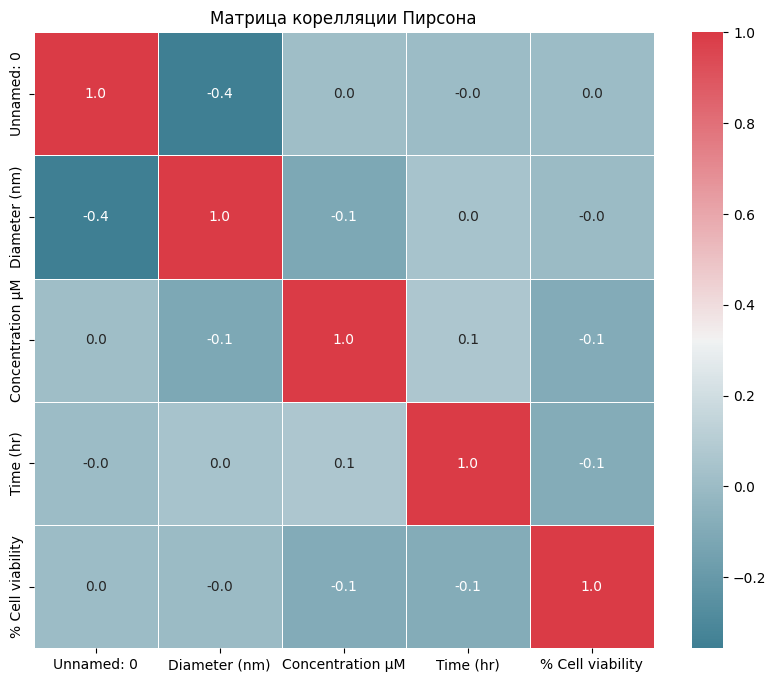

In [ ]:
corr = df3.corr()
f, ax = plt.subplots(figsize=(10, 8)) #создание графика и определение его размеров
cmap = sns.diverging_palette(220, 10, as_cmap=True) #создание палитры для корреляционного графика
sns.heatmap(corr,cmap=cmap, linewidths=.5, annot=True, fmt=".1f") # возьмем abs значение, чтобы нас не смущали отрицительные корреляции
plt.title('Матрица корелляции Пирсона')
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта

Практически везде корелляция нулевая. Зависимостей не установлено

Колонку Zeta нужно перевести в float. Но из-за значения 'Positive', которое встречается лишь 1 раз, это сделать не удается. Изменим это.

In [ ]:
df3 = df3.loc[df3['Zeta potential (mV)'] != 'Positive']

In [ ]:
df3['Zeta potential (mV)'] = pd.to_numeric(df3['Zeta potential (mV)']) # переводим к численным значениям

<ipython-input-342-7c3d44de4090>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Zeta potential (mV)'] = pd.to_numeric(df3['Zeta potential (mV)']) # переводим к численным значениям


In [ ]:
df3.info() # проверяем правильность данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 1063
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1669 non-null   int64  
 1   Material                         1669 non-null   object 
 2   Type                             1669 non-null   object 
 3   Coat                             1432 non-null   object 
 4   Diameter (nm)                    1669 non-null   float64
 5   Concentration μM                 1669 non-null   float64
 6   Zeta potential (mV)              1669 non-null   float64
 7   Cells                            1669 non-null   object 
 8   Cell line (L)/primary cells (P)  1669 non-null   object 
 9   body_cells                       1669 non-null   object 
 10  Cell_Age                         1669 non-null   object 
 11  Time (hr)                        1669 non-null   int64  
 12  % Cell viability    

Построим общие гистограммы по следующим значениям: 'Diameter (nm)', 'Concentration μM', '% Cell viability', 'Zeta potential (mV)', 'Time (hr)'

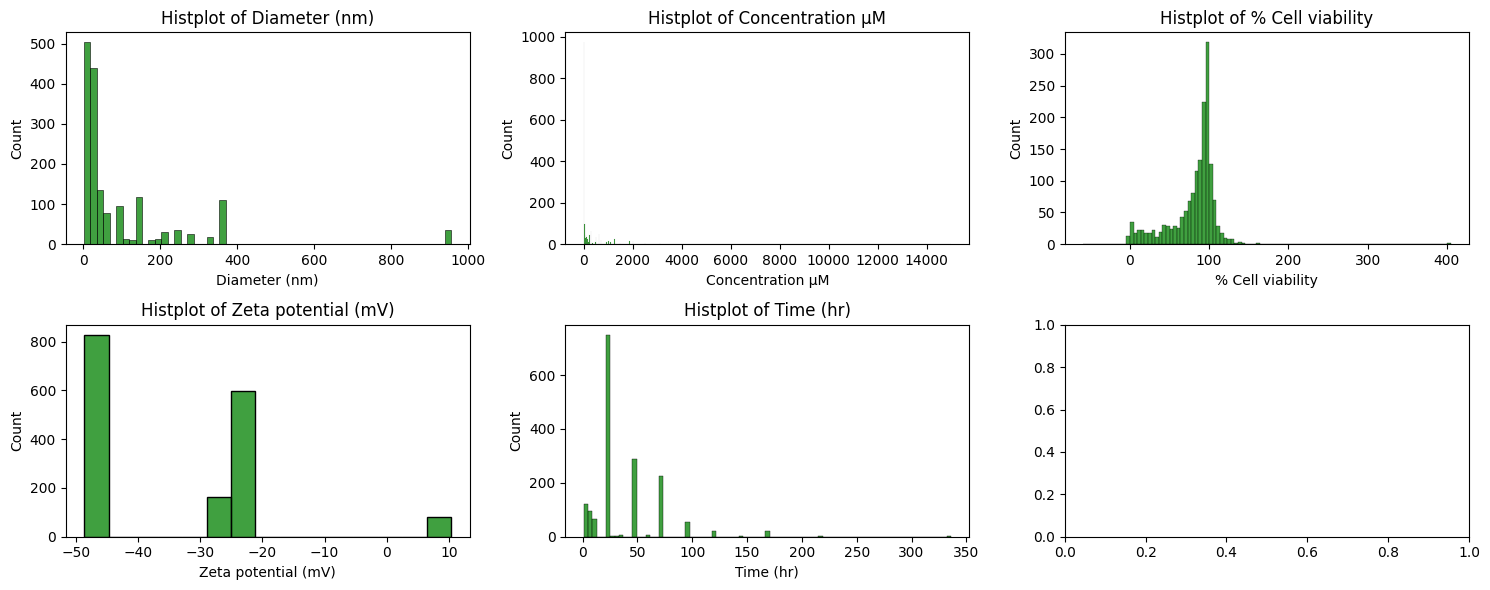

In [ ]:
numerical_features = ['Diameter (nm)', 'Concentration μM', '% Cell viability', 'Zeta potential (mV)', 'Time (hr)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df3, x=feature, ax=axes[i], color='green')
    axes[i].set_title(f'Histplot of {feature}')

plt.tight_layout()
plt.show()

Аналогичным образом построим ящики с усами, чтобы проанализировать наличие выбросов

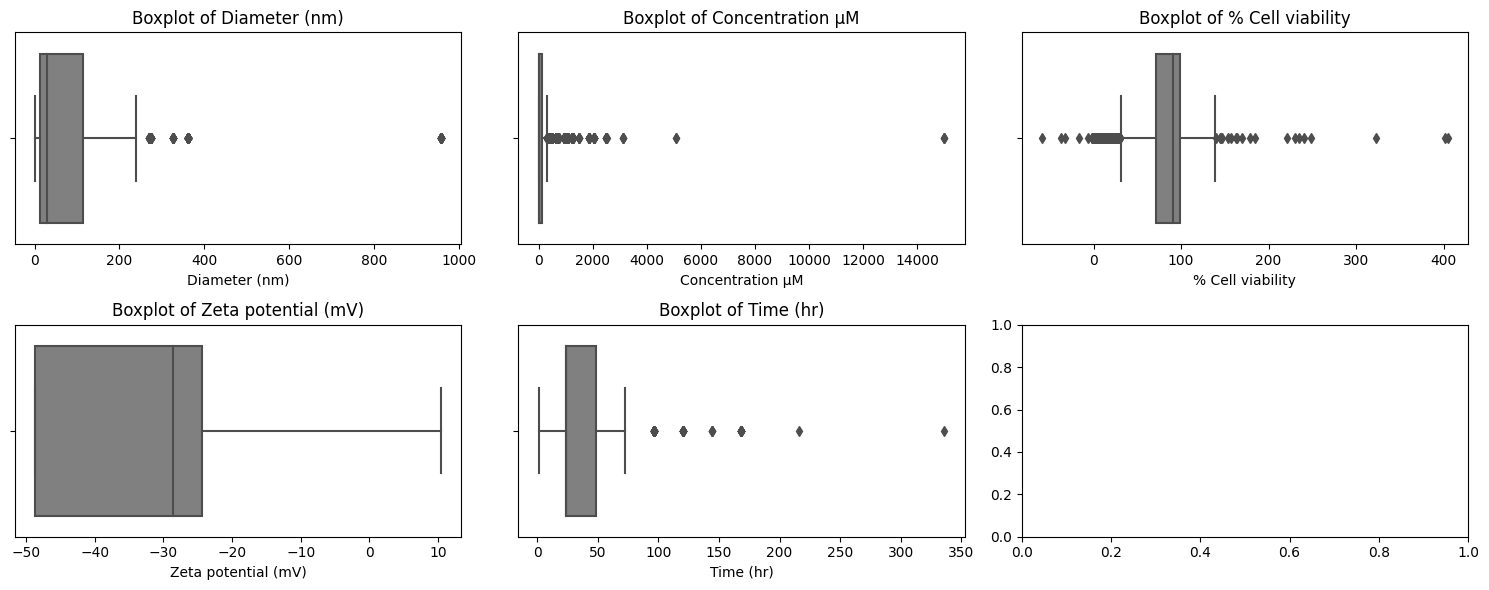

In [ ]:
numerical_features = ['Diameter (nm)', 'Concentration μM', '% Cell viability', 'Zeta potential (mV)', 'Time (hr)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 6))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df3, x=feature, ax=axes[i], color='grey')
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

Видим, что есть ряд выбросов от которых стоило бы избавиться

In [ ]:
df3 = df3.loc[df3['Diameter (nm)'] < 420]
df3 = df3.loc[df3['Concentration μM'] < 4000]
df3 = df3.loc[df3['% Cell viability'] < 300]
df3 = df3.loc[df3['Time (hr)'] < 200]

Также посмотрим на то, как зависит Time (hr) от % Cell viability

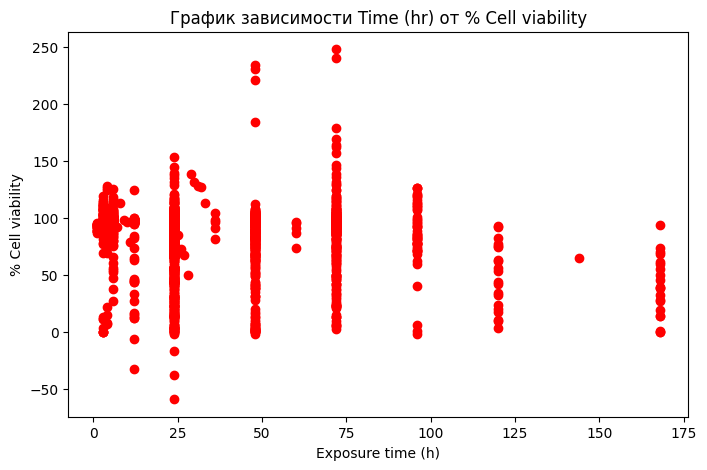

In [ ]:

fig, ax = plt.subplots(figsize = (8,5)) # Инициализация графиков и его размеров
ax.scatter(df3['Time (hr)'], df3['% Cell viability'], color = 'red')
plt.title('График зависимости Time (hr) от % Cell viability')
plt.xlabel('Exposure time (h)')
plt.ylabel('% Cell viability')
plt.show() #Вывод графика

Заменим значения в столбце Coat, где - на no data

In [ ]:
df3.loc[df3['Coat'] == ' ', 'Coat'] = 'No data'

In [ ]:
# df3.loc[df3['Cells'] == 'A549', 'Coat'] = 'PVP'
# df3.loc[df3['Cells'] == 'HCMEC', 'Coat'] =
# df3.loc[df3['Cells'] == 'CCL-110', 'Coat'] = 'Citrate'
# df3.loc[df3['Cells'] == 'hPDLF', 'Coat'] =
# df3.loc[df3['Cells'] == 'HeLa', 'Coat'] = 'Chitosan'
# df3.loc[df3['Cells'] == 'HEK293', 'Coat'] = 'Chitosan'
# df3.loc[df3['Cells'] == 'RAW264.7', 'Coat'] = 'Citrate'
# df3.loc[df3['Cells'] == 'mDF', 'Coat'] =
# df3.loc[df3['Cells'] == 'HepG2', 'Coat'] =
# df3.loc[df3['Cells'] == 'REFPEC', 'Coat'] =
# df3.loc[df3['Cells'] == 'L-02', 'Coat'] =
# df3.loc[df3['Cells'] == 'HepG2', 'Coat'] =

Построим график зависимости Coat от количества встречающихся элементов. Видим, что очень много пропусков. Самые часто встречающиеся значения это PEI, Citrate and PVP

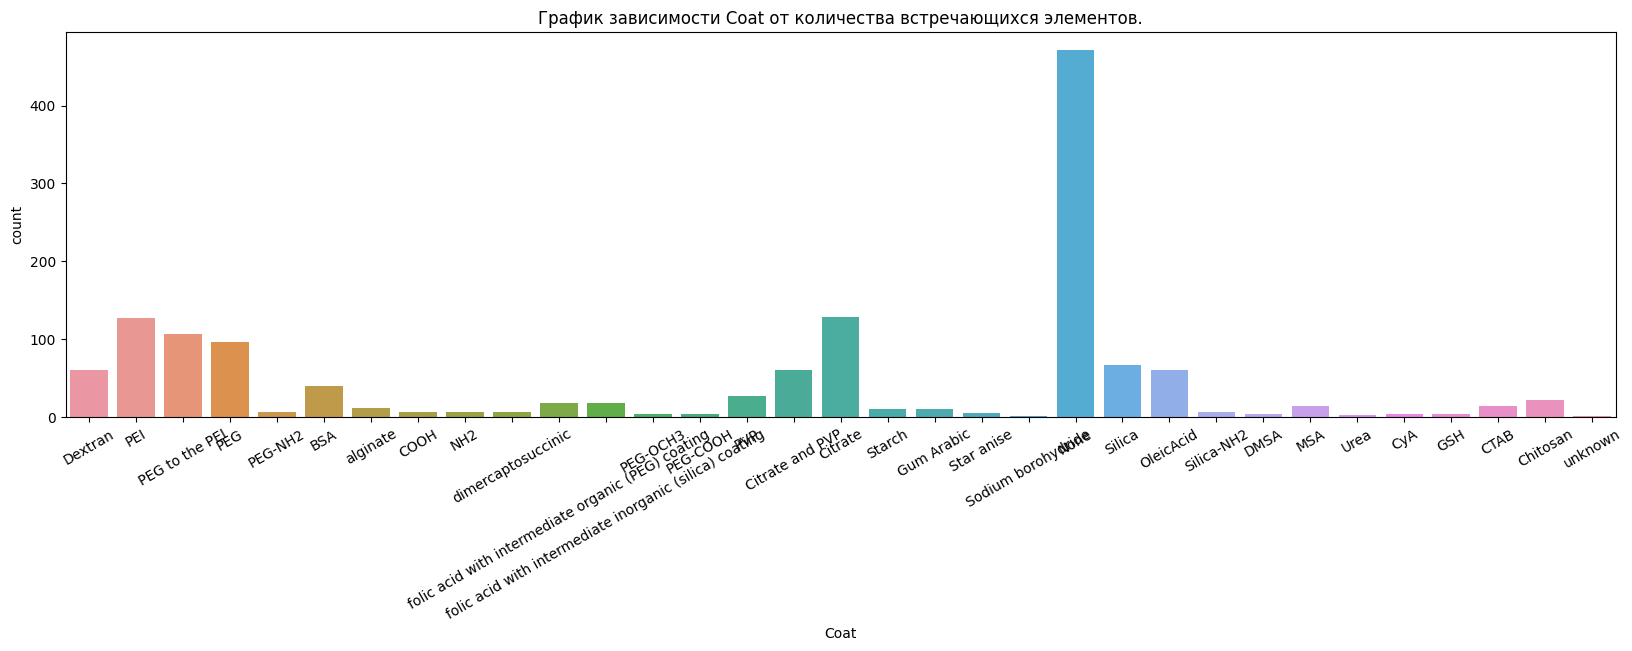

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(data=df3, x='Coat',)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('График зависимости Coat от количества встречающихся элементов.')
plt.show()

Построим график по материалам и посмотрим, какие в исследованиях применялись чаще всего.

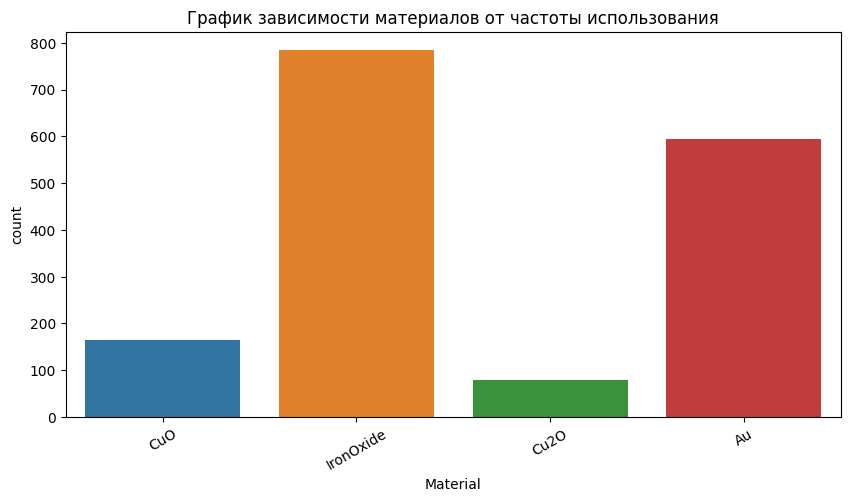

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df3, x='Material',)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.title('График зависимости материалов от частоты использования')
plt.show()

Чаще всего исследования проводилиьс с испльзованием IronOxide

Построим общие боксплоты по каждому материалу в зависимости от концентрации

<Axes: xlabel='Material', ylabel='Concentration μM'>

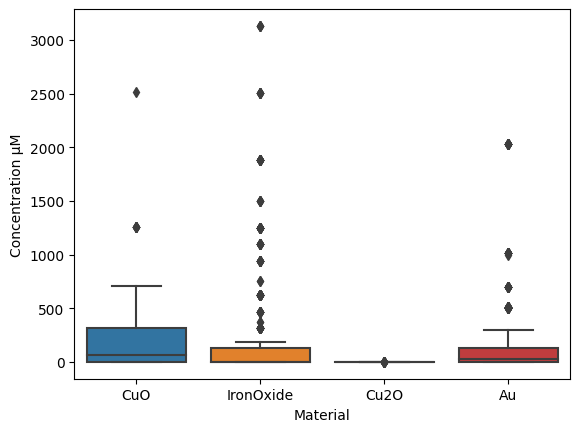

In [ ]:
sns.boxplot(data = df3, x = 'Material', y = 'Concentration μM')

Теперь построим для диаметров

<Axes: xlabel='Material', ylabel='Diameter (nm)'>

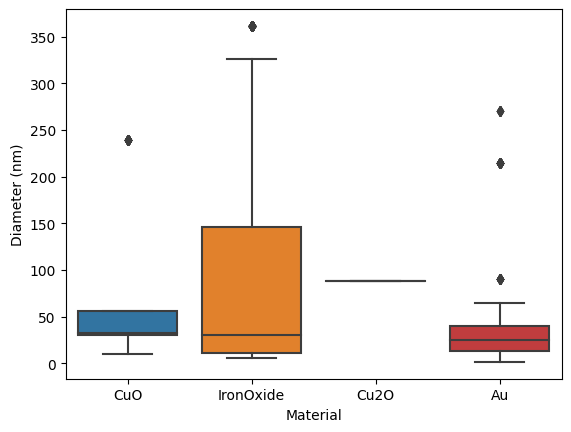

In [ ]:
sns.boxplot(data = df3, x = 'Material', y = 'Diameter (nm)')

Теперь построим графики зависимости Diameter (nm) от Concentration μM для каждого элемента, а также общий график.

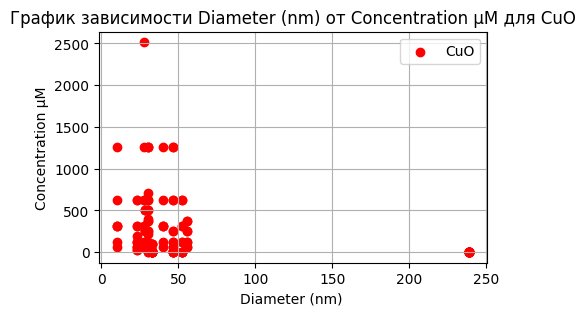

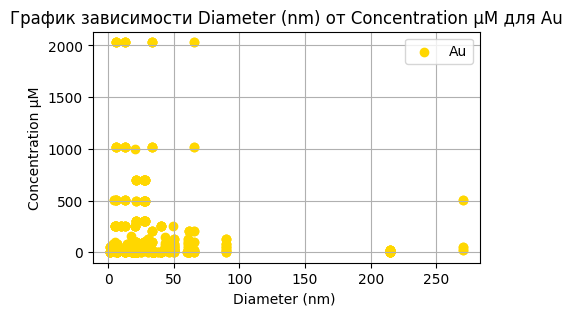

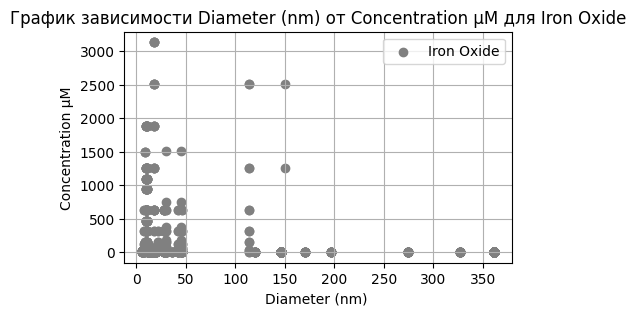

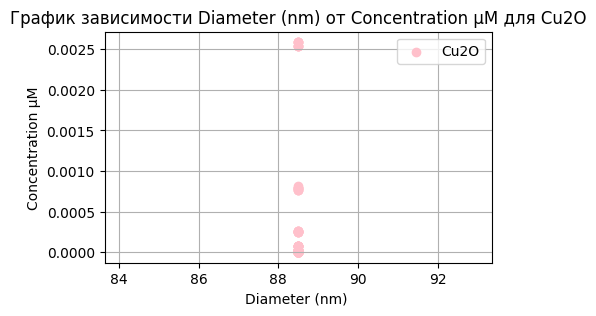

In [357]:
fig, ax = plt.subplots(figsize = (5,3)) # Инициализация графиков и его размеров
# Построим График зависимости Diameter (nm) от Concentration μM для CuO
df_cu = df3[df3['Material'] == 'CuO']
ax.scatter(df_cu['Diameter (nm)'], df_cu['Concentration μM'], color = 'red')
plt.title('График зависимости Diameter (nm) от Concentration μM для CuO')
plt.xlabel('Diameter (nm) ')
plt.ylabel('Concentration μM')
plt.legend(['CuO'])
plt.grid(True)
plt.show() #Вывод графика

fig, ax = plt.subplots(figsize =  (5,3)) # Инициализация графиков и его размеров
# Построим График зависимости Diameter (nm) от Concentration μM для CuO
df_au = df3[df3['Material'] == 'Au']
ax.scatter(df_au['Diameter (nm)'], df_au['Concentration μM'], color = 'gold')
plt.title('График зависимости Diameter (nm) от Concentration μM для Au')
plt.xlabel('Diameter (nm) ')
plt.ylabel('Concentration μM')
plt.legend(['Au'])
plt.grid(True)
plt.show() #Вывод графика

fig, ax = plt.subplots(figsize =  (5,3)) # Инициализация графиков и его размеров
# Построим График зависимости Diameter (nm) от Concentration μM для CuO
df_io = df3[df3['Material'] == 'IronOxide']
ax.scatter(df_io['Diameter (nm)'], df_io['Concentration μM'], color = 'grey')
plt.title('График зависимости Diameter (nm) от Concentration μM для Iron Oxide')
plt.xlabel('Diameter (nm) ')
plt.ylabel('Concentration μM')
plt.legend(['Iron Oxide'])
plt.grid(True)
plt.show() #Вывод графика

fig, ax = plt.subplots(figsize =  (5,3)) # Инициализация графиков и его размеров
# Построим График зависимости Diameter (nm) от Concentration μM для CuO
df_cu2o = df3[df3['Material'] == 'Cu2O']
ax.scatter(df_cu2o['Diameter (nm)'], df_cu2o['Concentration μM'], color = 'pink')
plt.title('График зависимости Diameter (nm) от Concentration μM для Cu2O')
plt.xlabel('Diameter (nm) ')
plt.ylabel('Concentration μM')
plt.legend(['Cu2O'])
plt.grid(True)
plt.show() #Вывод графика


На основании данных графиков можно сделать вывод о том, что для CuO значением диаметра практически постоянно и не зависит от Concentration μM. Для остальных материалов данный показатель изменяется в большей степени, однако присутствует некое скопление точек в пространстве.

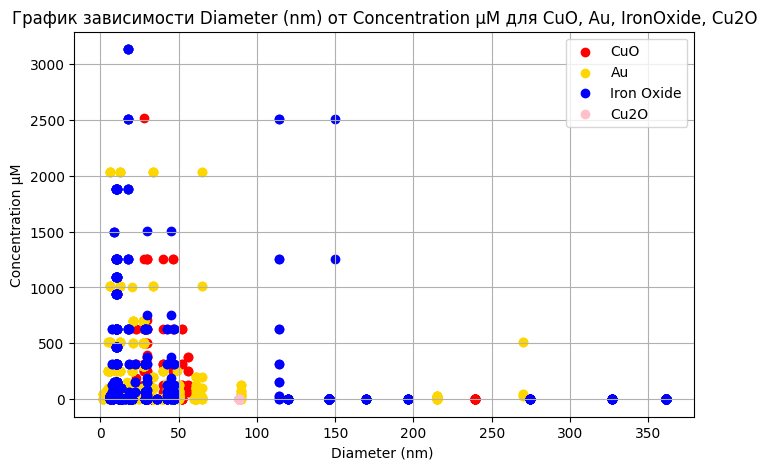

In [358]:
fig, ax = plt.subplots(figsize = (8,5)) # Инициализация графиков и его размеров
# Построим График зависимости Diameter (nm) от Concentration μM для CuO
# df_cu = df3[df3['Material'] == 'CuO']
ax.scatter(df_cu['Diameter (nm)'], df_cu['Concentration μM'], color = 'red')
ax.scatter(df_au['Diameter (nm)'], df_au['Concentration μM'], color = 'gold')
ax.scatter(df_io['Diameter (nm)'], df_io['Concentration μM'], color = 'blue')
ax.scatter(df_cu2o['Diameter (nm)'], df_cu2o['Concentration μM'], color = 'pink')
plt.title('График зависимости Diameter (nm) от Concentration μM для CuO, Au, IronOxide, Cu2O')
plt.xlabel('Diameter (nm) ')
plt.ylabel('Concentration μM')
plt.legend(['CuO', 'Au', 'Iron Oxide', 'Cu2O'])
plt.grid(True)
plt.show() #Вывод графика

Выгружаем итоговый датасет в формате csv

In [ ]:
df3.to_csv(r'df3.csv')